In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
  # Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)


In [4]:
# Normalize data (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8597 - loss: 0.4450 - val_accuracy: 0.9828 - val_loss: 0.0606
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9728 - loss: 0.0905 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9829 - loss: 0.0567 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9908 - val_loss: 0.0343
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9888 - loss: 0.0372 - val_accuracy: 0.9901 - val_loss: 0.0377


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9861 - loss: 0.0361
Test Accuracy: 0.9886000156402588


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


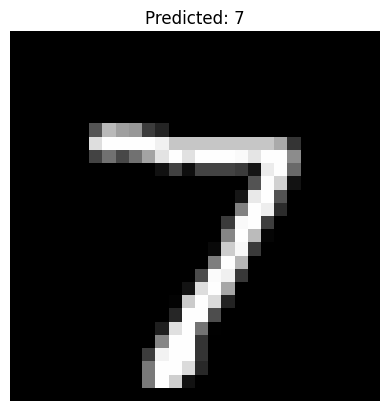

In [9]:
predictions = model.predict(x_test)

# Show prediction for first test image
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()


In [10]:
model.save("mnist_cnn_model.h5")
